# Project - Extracting Stock Data in multiple ways with Python #
In this project, I attempt to extract stock market data for different companies in NIFTY50 (NSE) for demo purposes in a couple of ways. 
First, I use the renowned library yfinance in order to fetch the data individually for each company.
Then, I optimise the above process by running a loop over a dictionary that contains the company name and its Ticker Code.
Finally, I achieve the same with web scraping using Requests and Beautiful Soup

I plot the graphs each time to show that the result in either process is the same

In [1]:
!pip install yfinance
!pip install matplotlib
!pip install pandas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Method 1 - Using YFinance Library to directly fetch stock data #

## Initial attempts with Ticker to fetch and plot data of selected companies ##

In [163]:
# Ticker Module in yFinance allows us to access functions to extract data if we know the ticker symbol

#Trying to get stock for some NIFTY50 Companies
tcs = yf.Ticker("TCS.NS")
ntpc= yf.Ticker("NTPC.NS")
ril = yf.Ticker("RELIANCE.NS")
airtel = yf.Ticker("BHARTIARTL.NS")
adani = yf.Ticker("ADANIENT.NS")
itc = yf.Ticker("ITC.NS")


In [165]:
tcs_info = tcs.info
ntpc_info = ntpc.info
ril_info = ril.info
airtel_info = airtel.info
adani_info = adani.info
itc_info = itc.info

In [166]:
tcs_share_data = tcs.history(period='5y')
ntpc_share_data = ntpc.history(period='5y')
ril_share_data = ril.history(period='5y')
airtel_share_data = airtel.history(period='5y')
adani_share_data = adani.history(period='5y')
itc_share_data = itc.history(period='5y')

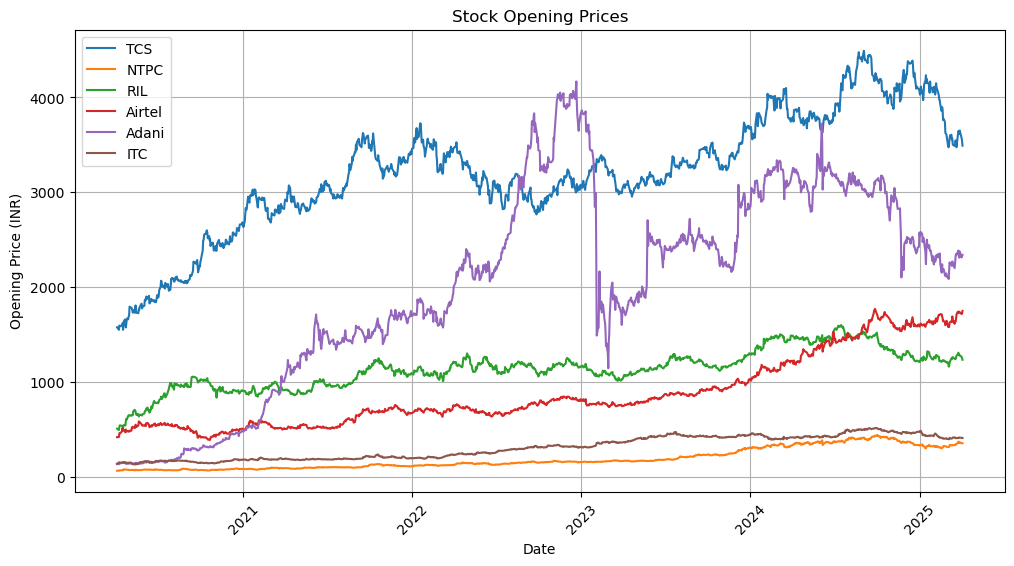

In [169]:
tcs_share_data.reset_index(inplace=True)
ntpc_share_data.reset_index(inplace=True)
ril_share_data.reset_index(inplace=True)
airtel_share_data.reset_index(inplace=True)
adani_share_data.reset_index(inplace=True)
itc_share_data.reset_index(inplace=True)

#Define the Plot size
plt.figure(figsize=(12, 6))

#Add the plot data
plt.plot(tcs_share_data["Date"], tcs_share_data["Open"], label='TCS')
plt.plot(ntpc_share_data["Date"], ntpc_share_data["Open"], label='NTPC')
plt.plot(ril_share_data["Date"], ril_share_data["Open"], label='RIL')
plt.plot(airtel_share_data["Date"], airtel_share_data["Open"], label='Airtel')
plt.plot(adani_share_data["Date"], adani_share_data["Open"], label='Adani')
plt.plot(itc_share_data["Date"], itc_share_data["Open"], label='ITC')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Opening Price (INR)")
plt.title("Stock Opening Prices")
plt.legend()  # Show stock labels
plt.xticks(rotation=45)  # Rotate dates for readability
plt.grid(True)  # Add a grid

# Show the plot
plt.show()


## Optimisation to add as many companies as possible to the list manually ##

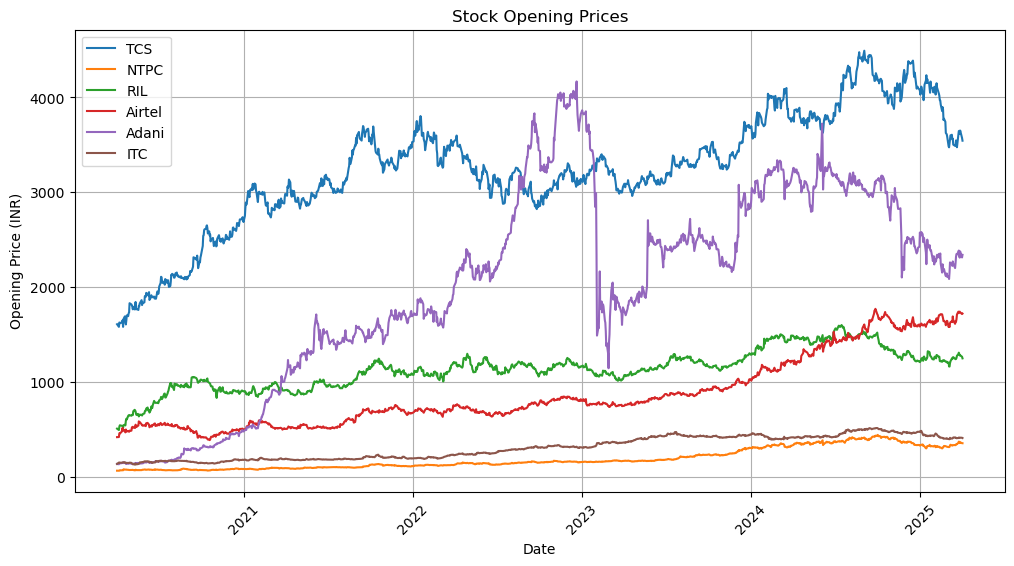

In [10]:
#FURTHER OPTIMISATION TO ADD AS MANY AS POSSIBLE
stocks = {
    "TCS": "TCS.NS",
    "NTPC": "NTPC.NS",
    "RIL": "RELIANCE.NS",
    "Airtel": "BHARTIARTL.NS",
    "Adani": "ADANIENT.NS",
    "ITC": "ITC.NS",
}

# Create an empty dictionary to store data
stock_data = {}

# Download data for each stock
for name, ticker in stocks.items():
    stock = yf.Ticker(ticker)
    stock_data[name] = stock.history(period="5y")
    stock_data[name].reset_index(inplace=True)  # Reset index to move 'Date' to a column

# Plot all stocks on the same graph
plt.figure(figsize=(12, 6))

for name, data in stock_data.items():
    plt.plot(data["Date"], data["Open"], label=name)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Opening Price (INR)")
plt.title("Stock Opening Prices")
plt.legend()  # Show stock labels
plt.xticks(rotation=45)  # Rotate dates for readability
plt.grid(True)  # Add a grid

# Show the plot
plt.show()

# Method 2 - Web Scraping Yahoo Finance with requests and beautifulsoup #

In [5]:
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml

In [3]:
import requests
from bs4 import BeautifulSoup

In [3]:
stocks = {
    "TCS": "TCS.NS",
    "NTPC": "NTPC.NS",
    "RIL": "RELIANCE.NS",
    "Airtel": "BHARTIARTL.NS",
    "Adani": "ADANIENT.NS",
    "ITC": "ITC.NS",
}

def url_generator(tick:str) -> str :
    return 'https://finance.yahoo.com/quote/{}/history/?period1=1585831800&period2=1743598183'.format(tick)

company_urls = {}

for name,stock in stocks.items():
    company_urls[name] = url_generator(stock)

In [5]:
import time

company_data = {}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
## The Following code can sometimes exceed Juypter Rate Limit.

# for name,url in company_urls.items():
#     time.sleep(5)
#     response = requests.get(url, headers=headers)
#     if response.status_code == 200 :
#         company_data[name] = response.text
#     else:
#         print('failed')

response = requests.get('https://finance.yahoo.com/quote/TCS.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['TCS'] = response.text
print (response.status_code)

200


In [7]:
response = requests.get('https://finance.yahoo.com/quote/ITC.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['ITC'] = response.text
print (response.status_code)

200


In [9]:
response = requests.get('https://finance.yahoo.com/quote/NTPC.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['NTPC'] = response.text
print (response.status_code)

200


In [11]:
response = requests.get('https://finance.yahoo.com/quote/RELIANCE.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['RIL'] = response.text
print (response.status_code)

200


In [13]:
response = requests.get('https://finance.yahoo.com/quote/BHARTIARTL.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['Airtel'] = response.text
print (response.status_code)

200


In [15]:
response = requests.get('https://finance.yahoo.com/quote/ADANIENT.NS/history/?period1=1585831800&period2=1743598183', headers=headers)
company_data['Adani'] = response.text
print (response.status_code)

200


In [17]:
company_parsed={}
for name, html in company_data.items():
    company_parsed[name] = BeautifulSoup(company_data[name], 'html.parser')

In [19]:
tcs_parsed = company_parsed['TCS']
itc_parsed = company_parsed['ITC']
ntpc_parsed = company_parsed['NTPC']
adani_parsed = company_parsed['Adani']
airtel_parsed = company_parsed['Airtel']
ril_parsed = company_parsed['RIL']

In [21]:
tcs_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = tcs_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        tcs_dataframe = pd.concat([tcs_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
tcs_dataframe.reset_index(inplace=True)
tcs_dataframe

,index,Date,Open,High,Low,Close,Volume,Adj Close
0,0,"Apr 2, 2025","3,544.00","3,564.10","3,530.05","3,543.95","1,764,313","3,543.95"
1,1,"Apr 1, 2025","3,572.70","3,584.00","3,525.00","3,550.80","2,618,493","3,550.80"
2,2,"Mar 28, 2025","3,651.00","3,660.95","3,591.90","3,606.15","2,051,919","3,606.15"
3,3,"Mar 27, 2025","3,614.85","3,663.00","3,610.50","3,651.20","2,528,474","3,651.20"
4,4,"Mar 26, 2025","3,647.75","3,680.50","3,625.85","3,635.80","1,734,499","3,635.80"
...,...,...,...,...,...,...,...,...
1233,1233,"Apr 13, 2020","1,761.00","1,787.00","1,746.00","1,759.25","2,990,438","1,621.72"
1234,1234,"Apr 9, 2020","1,750.45","1,778.80","1,731.20","1,766.15","5,307,397","1,628.08"
1235,1235,"Apr 8, 2020","1,760.00","1,806.00","1,701.00","1,705.45","6,285,615","1,572.13"
1236,1236,"Apr 7, 2020","1,710.00","1,785.85","1,705.00","1,775.20","5,427,577","1,636.43"


In [23]:
itc_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = itc_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        itc_dataframe = pd.concat([itc_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
itc_dataframe.reset_index(inplace=True)

In [25]:
ntpc_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = ntpc_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        ntpc_dataframe = pd.concat([ntpc_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
ntpc_dataframe.reset_index(inplace=True)

In [27]:
adani_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = adani_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        adani_dataframe = pd.concat([adani_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
adani_dataframe.reset_index(inplace=True)



In [29]:
airtel_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = airtel_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        airtel_dataframe = pd.concat([airtel_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
airtel_dataframe.reset_index(inplace=True)

In [31]:
ril_dataframe = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
body = ril_parsed
rows = body.find('tbody').find_all('tr')
for row in rows:
    col = row.find_all('td')
    if len(col) == 7: 
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        ril_dataframe = pd.concat([ril_dataframe, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
ril_dataframe.reset_index(inplace=True)

In [33]:
## CHECKING THE DATAFRAMES
tcs_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      1238 non-null   int64 
 1   Date       1238 non-null   object
 2   Open       1238 non-null   object
 3   High       1238 non-null   object
 4   Low        1238 non-null   object
 5   Close      1238 non-null   object
 6   Volume     1238 non-null   object
 7   Adj Close  1238 non-null   object
dtypes: int64(1), object(7)
memory usage: 77.5+ KB


### Observations of the generated dataframes ###
1. Date is not in date time format
2. Prices are in string format.
3. Prices contain commas and as such cannot be readily typecast into strings

In [37]:
#Converting string date into proper formatting
itc_dataframe['Date'] = pd.to_datetime(itc_dataframe['Date'], format='%b %d, %Y')
tcs_dataframe['Date'] = pd.to_datetime(tcs_dataframe['Date'], format='%b %d, %Y')
ntpc_dataframe['Date'] = pd.to_datetime(ntpc_dataframe['Date'], format='%b %d, %Y')
adani_dataframe['Date'] = pd.to_datetime(adani_dataframe['Date'], format='%b %d, %Y')
airtel_dataframe['Date'] = pd.to_datetime(airtel_dataframe['Date'], format='%b %d, %Y')
ril_dataframe['Date'] = pd.to_datetime(ril_dataframe['Date'], format='%b %d, %Y')

#Adding Timezone
itc_dataframe['Date'] = itc_dataframe['Date'].dt.tz_localize('Asia/Kolkata')
tcs_dataframe['Date'] = tcs_dataframe['Date'].dt.tz_localize('Asia/Kolkata')
ntpc_dataframe['Date'] = ntpc_dataframe['Date'].dt.tz_localize('Asia/Kolkata')
adani_dataframe['Date'] = adani_dataframe['Date'].dt.tz_localize('Asia/Kolkata')
airtel_dataframe['Date'] = airtel_dataframe['Date'].dt.tz_localize('Asia/Kolkata')
ril_dataframe['Date'] = ril_dataframe['Date'].dt.tz_localize('Asia/Kolkata')


In [39]:
tcs_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   index      1238 non-null   int64                       
 1   Date       1238 non-null   datetime64[ns, Asia/Kolkata]
 2   Open       1238 non-null   object                      
 3   High       1238 non-null   object                      
 4   Low        1238 non-null   object                      
 5   Close      1238 non-null   object                      
 6   Volume     1238 non-null   object                      
 7   Adj Close  1238 non-null   object                      
dtypes: datetime64[ns, Asia/Kolkata](1), int64(1), object(6)
memory usage: 77.5+ KB


In [41]:
# Define numeric columns
numeric_cols = ["Open", "High", "Low", "Close", "Volume", "Adj Close"]

# Remove commas and convert to float
tcs_dataframe[numeric_cols] = (
    tcs_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)

ntpc_dataframe[numeric_cols] = (
    ntpc_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)

itc_dataframe[numeric_cols] = (
    itc_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)

adani_dataframe[numeric_cols] = (
    adani_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)

airtel_dataframe[numeric_cols] = (
    airtel_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)

ril_dataframe[numeric_cols] = (
    ril_dataframe[numeric_cols]
    .replace({',': ''}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors='coerce')  # Convert to float
)


In [45]:
#Checking dataframes to ensure proper types and values

tcs_dataframe.head()
tcs_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   index      1238 non-null   int64                       
 1   Date       1238 non-null   datetime64[ns, Asia/Kolkata]
 2   Open       1238 non-null   float64                     
 3   High       1238 non-null   float64                     
 4   Low        1238 non-null   float64                     
 5   Close      1238 non-null   float64                     
 6   Volume     1237 non-null   float64                     
 7   Adj Close  1238 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(6), int64(1)
memory usage: 77.5 KB


In [47]:
company_df = {
    'TCS' : tcs_dataframe,
    'ITC' : itc_dataframe,
    'NTPC': ntpc_dataframe,
    'Adani': adani_dataframe,
    'Airtel' : airtel_dataframe,
    'RIL' : ril_dataframe
}

In [51]:
company_df['TCS'].head()

,index,Date,Open,High,Low,Close,Volume,Adj Close
0,0,2025-04-02 00:00:00+05:30,3544.00,3564.10,3530.05,3543.95,1764313.0,3543.95
1,1,2025-04-01 00:00:00+05:30,3572.70,3584.00,3525.00,3550.80,2618493.0,3550.80
2,2,2025-03-28 00:00:00+05:30,3651.00,3660.95,3591.90,3606.15,2051919.0,3606.15
3,3,2025-03-27 00:00:00+05:30,3614.85,3663.00,3610.50,3651.20,2528474.0,3651.20
4,4,2025-03-26 00:00:00+05:30,3647.75,3680.50,3625.85,3635.80,1734499.0,3635.80


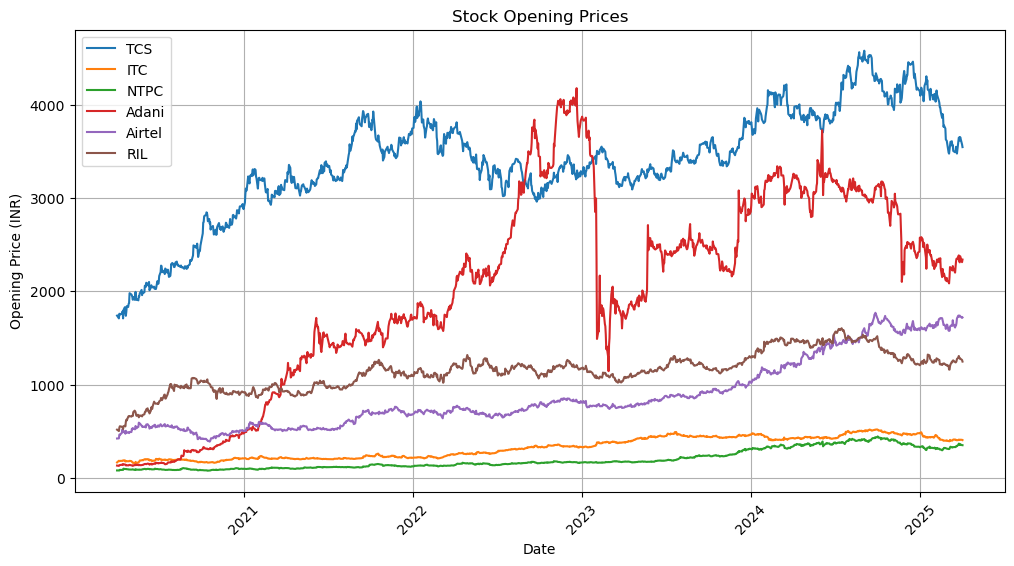

In [53]:
plt.figure(figsize=(12, 6))

for name, dataframe in company_df.items():
    plt.plot(dataframe["Date"], dataframe["Open"], label=name)

# plt.plot(company_df['TCS']["Date"], company_df['TCS']["Open"], label='TCS')
# plt.plot(tcs_share_data["Date"], tcs_share_data["Open"], label='TCS')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Opening Price (INR)")
plt.title("Stock Opening Prices")
plt.legend()  # Show stock labels
plt.xticks(rotation=45)  # Rotate dates for readability
plt.grid(True)  # Add a grid

# Show the plot
plt.show()